<a href="https://colab.research.google.com/github/gokuljagannadh/Airbnb_Booking_Analysis/blob/main/TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 



In [16]:
#loading txt files from a folder 
#import required module
import os
# assign directory
directory = '/content/drive/MyDrive/Colab Notebooks/Python Assignment/'

# iterate over files in
# that directory
list_dir=[]
for filename in os.listdir(directory):
  if filename.endswith('.txt'):
  	f = os.path.join(directory, filename)
  else:
    pass
  list_dir.append(f)


	# checking if it is a file
#if os.path.isfile(f):
#  	 X=list_dir.append(print(f))
  

In [17]:

#Making a list of emails by reading txt files
email_list=[]
for file in list_dir:
  row=[]
  s=" "
  email = open(file, 'r')
  s=s.join(email)
  email_list.append(s) 
     #for i in line.split(","):
      #   row[-1].append(i)
email_list[1]


'Message-ID: <1414510.1075846143230.JavaMail.evans@thyme>\n Date: Fri, 10 Sep 1999 06:22:00 -0700 (PDT)\n From: steven.kean@enron.com\n To: margaret.carson@enron.com\n Subject: Speech to the British Institute of Energy Economists\n Mime-Version: 1.0\n Content-Type: text/plain; charset=us-ascii\n Content-Transfer-Encoding: 7bit\n X-From: Steven J Kean\n X-To: Margaret Carson\n X-cc: \n X-bcc: \n X-Folder: \\Steven_Kean_Dec2000_1\\Notes Folders\\All documents\n X-Origin: KEAN-S\n X-FileName: skean.nsf\n \n I agree with Mark\'s points.  While we have advocated our merger with PGE \n (which did not concentrate market power) we have intervened in opposition to \n most others.  Moreover, there is some hope that the German government will \n take the opportunity to use the proposed utility merger to force greater open \n access.   We will likely encourage that action and may oppose the merger \n otherwise.   Most mergers in this industry are defensive, not procompetitive, \n and, in my view, 

In [15]:
len(list_dir)

1580

In [18]:
# Now we extract the message body from the given email
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ":"  not in line:
            message += line.strip()
            email['body']= message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email


In [ ]:
email_list = []
for file in list_dir:
  row=[]
  email = open(file,'r')
  for line in email.readlines():
    row.append([line])
    email_list.append(row)

#print(email_list)

In [34]:
#Making a dataframe of the emails and renaming the column as message
emails=pd.DataFrame(email_list)
emails_df=emails.rename(columns={0:"message"})

In [28]:
parse_raw_message(raw_msg)['body']

'I agree with Mark\'s points.  While we have advocated our merger with PGE(which did not concentrate market power) we have intervened in opposition tomost others.  Moreover, there is some hope that the German government willtake the opportunity to use the proposed utility merger to force greater openaccess.   We will likely encourage that action and may oppose the mergerotherwise.   Most mergers in this industry are defensive, not procompetitive,and, in my view, deserve no credit for convergence, innovation, orliberlization.PM ---------------------------Mark Schroeder@ECTKean/HOU/EES@EESMargaret - apologies for the delay in getting comments to you on yourspeech.  Due to press of other matters I will be brief.First, your speech caption, refernecing "mergers" is somewhat different thanthe topic shown in the agenda, i.e., "Industry Structure and CompetitiveBehaviour", but I trust you are wroking that out with the BIEE.Second, in your first paragraph, you note that developments in the ener

In [35]:
#Here let's extract the body of each email
emails_df['body']=emails_df['message'].apply(parse_raw_message)

In [36]:
#Also defining a function to extract the values of the key value pair in the message body dictionary
def content(txt,body):
  return txt['body']

In [50]:
#applying the above function to extract the message body
emails_df['message_content']  = emails_df.apply(lambda x: content(x['body'],'body'),axis=1)

In [39]:
emails_df.shape

(1580, 3)

In [ ]:
email_df1.drop(email_df1.query(
    "body == '' | to == '' | from_ == ''"
).index, inplace=True)

In [ ]:
emails_df.head()

,message,body
0,Message-ID: <26804150.1075842955435.JavaMail.e...,"{'body': 'amosher@appanet.org, hcameron@uclink..."
1,Message-ID: <26804150.1075842955435.JavaMail.e...,"{'body': 'amosher@appanet.org, hcameron@uclink..."
2,Message-ID: <4131316.1075840896739.JavaMail.ev...,{'body': 'Louise --LIsa Yoho suggested I forwa...
3,Message-ID: <4131316.1075840896739.JavaMail.ev...,{'body': 'Louise --LIsa Yoho suggested I forwa...
4,Message-ID: <29049822.1075842045435.JavaMail.e...,"{'body': 'greg.whalley@enron.com, james.derric..."


In [40]:
# Now let us define a function to remove the punctuations in the message body
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [51]:
remove_punctuation(emails_df['message_content'][1])

'I agree with Marks points  While we have advocated our merger with PGEwhich did not concentrate market power we have intervened in opposition tomost others  Moreover there is some hope that the German government willtake the opportunity to use the proposed utility merger to force greater openaccess   We will likely encourage that action and may oppose the mergerotherwise   Most mergers in this industry are defensive not procompetitiveand in my view deserve no credit for convergence innovation orliberlizationPM Mark SchroederECTKeanHOUEESEESMargaret  apologies for the delay in getting comments to you on yourspeech  Due to press of other matters I will be briefFirst your speech caption refernecing mergers is somewhat different thanthe topic shown in the agenda ie Industry Structure and CompetitiveBehaviour but I trust you are wroking that out with the BIEESecond in your first paragraph you note that developments in the energysector over the last decade are due to the mergers of the last

In [52]:
#removing punctuations from each email
emails_df['message_content']=emails_df['message_content'].apply(remove_punctuation)

In [53]:
#Removing stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [55]:
from nltk.corpus import stopwords

sw = list(stopwords.words('english'))
print(sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
stopwords(emails_df['message_content'][0])

'agree marks points advocated merger pgewhich concentrate market power intervened opposition tomost others moreover hope german government willtake opportunity use proposed utility merger force greater openaccess likely encourage action may oppose mergerotherwise mergers industry defensive procompetitiveand view deserve credit convergence innovation orliberlizationpm mark schroederectkeanhoueeseesmargaret apologies delay getting comments yourspeech due press matters brieffirst speech caption refernecing mergers somewhat different thanthe topic shown agenda ie industry structure competitivebehaviour trust wroking bieesecond first paragraph note developments energysector last decade due mergers last five years apoint retrun later event entirely consistent interms timeframesthird surprised enron corp view gas electricitymarkets grew decade due mergers past thingslike unbundling nondiscriminatory thirdparty access featuredprominently advocacy indeed though role enron iwould thought many re

In [69]:
# Removing the stopwords from the message 
emails_df['stop_word_message']=emails_df['message content'].apply(stopwords)

TOP WORDS BEFORE STEMMING

In [71]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(emails_df['stop_word_message'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [77]:
print(dictionary)

dict_items([('agree', 4247), ('marks', 29717), ('points', 36291), ('advocated', 3985), ('merger', 30322), ('pgewhich', 35729), ('concentrate', 12394), ('market', 29493), ('power', 36650), ('intervened', 25503), ('opposition', 34083), ('tomost', 49187), ('others', 34362), ('moreover', 31349), ('hope', 23734), ('german', 21494), ('government', 21896), ('willtake', 52632), ('opportunity', 34066), ('use', 50694), ('proposed', 37956), ('utility', 50857), ('force', 20244), ('greater', 22053), ('openaccess', 33963), ('likely', 28355), ('encourage', 17759), ('action', 3657), ('may', 29871), ('oppose', 34071), ('mergerotherwise', 30330), ('mergers', 30331), ('industry', 24872), ('defensive', 14948), ('procompetitiveand', 37645), ('view', 51212), ('deserve', 15337), ('credit', 13760), ('convergence', 13130), ('innovation', 25132), ('orliberlizationpm', 34281), ('mark', 29481), ('schroederectkeanhoueeseesmargaret', 41885), ('apologies', 5894), ('delay', 15000), ('getting', 21544), ('comments', 11

In [78]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [82]:
#we can visualise the top words 
#top_vacab = vocab_bef_stem.head(10)
#top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [83]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [84]:
emails_df['stop_word_message'] = emails_df['stop_word_message'].apply(stemming)
emails_df.head(10)

,message,body,message content,message_content,stop_word_message
0,Message-ID: <1414510.1075846143230.JavaMail.ev...,{'body': 'I agree with Mark's points. While w...,I agree with Marks points While we have advoc...,I agree with Marks points While we have advoc...,agre mark point advoc merger pgewhich concentr...
1,Message-ID: <1414510.1075846143230.JavaMail.ev...,{'body': 'I agree with Mark's points. While w...,I agree with Marks points While we have advoc...,I agree with Marks points While we have advoc...,agre mark point advoc merger pgewhich concentr...
2,Message-ID: <1414510.1075846143230.JavaMail.ev...,{'body': 'I agree with Mark's points. While w...,I agree with Marks points While we have advoc...,I agree with Marks points While we have advoc...,agre mark point advoc merger pgewhich concentr...
3,Message-ID: <25405649.1075863428787.JavaMail.e...,{'body': 'FYIDad-----Original Message-----I wa...,FYIDadOriginal MessageI wanted to get back to ...,FYIDadOriginal MessageI wanted to get back to ...,fyidadorigin messagei want get back repli ques...
4,Message-ID: <25405649.1075863428787.JavaMail.e...,{'body': 'FYIDad-----Original Message-----I wa...,FYIDadOriginal MessageI wanted to get back to ...,FYIDadOriginal MessageI wanted to get back to ...,fyidadorigin messagei want get back repli ques...
5,Message-ID: <23046239.1075846146023.JavaMail.e...,{'body': 'Typo in second paragraph .. should b...,Typo in second paragraph should be companies ...,Typo in second paragraph should be companies ...,typo second paragraph compani companykaren den...
6,Message-ID: <23046239.1075846146023.JavaMail.e...,{'body': 'Typo in second paragraph .. should b...,Typo in second paragraph should be companies ...,Typo in second paragraph should be companies ...,typo second paragraph compani companykaren den...
7,Message-ID: <8721012.1075863428380.JavaMail.ev...,"{'body': '-----Original Message-----Vince,FYI,...",Original MessageVinceFYIGwynOriginal MessageCi...,Original MessageVinceFYIGwynOriginal MessageCi...,origin messagevincefyigwynorigin messagecindyp...
8,Message-ID: <8721012.1075863428380.JavaMail.ev...,"{'body': '-----Original Message-----Vince,FYI,...",Original MessageVinceFYIGwynOriginal MessageCi...,Original MessageVinceFYIGwynOriginal MessageCi...,origin messagevincefyigwynorigin messagecindyp...
9,Message-ID: <8721012.1075863428380.JavaMail.ev...,"{'body': '-----Original Message-----Vince,FYI,...",Original MessageVinceFYIGwynOriginal MessageCi...,Original MessageVinceFYIGwynOriginal MessageCi...,origin messagevincefyigwynorigin messagecindyp...


In [85]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(emails_df.stop_word_message)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


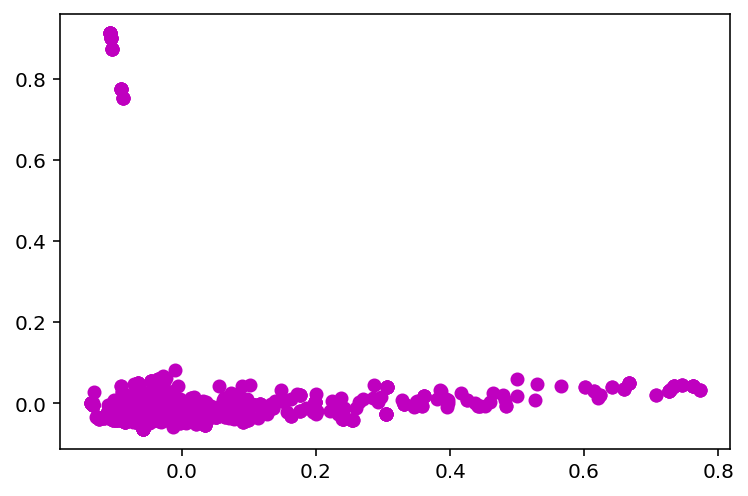

In [86]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()


In [111]:

features = vect.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [112]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [113]:
print(top_tfidf_feats(X,features,10))

  features                                              score
0       00    (0, 7218)\t0.05129198155228599\n  (0, 25582)...


In [115]:

print(top_feats_in_doc(X, features, 2, 10))

            features     score
0             merger  0.482224
1            converg  0.243688
2             speech  0.242280
3           demonstr  0.131267
4           industri  0.129705
5              innov  0.117221
6               good  0.111463
7  nondiscriminatori  0.102584
8          paragraph  0.090613
9         thirdparti  0.090613


In [117]:
def top_mean_feats(X, features,
 grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
        D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)


In [120]:
print(top_mean_feats(X,features,grp_ids=None,min_tfidf=0.1,top_n=25))

      features     score
0        power  0.017189
1        price  0.016823
2   california  0.016690
3       market  0.013608
4         said  0.012870
5        state  0.012752
6       electr  0.011733
7       energi  0.011071
8        email  0.009675
9       messag  0.009454
10        ferc  0.009442
11        meet  0.009161
12     compani  0.007942
13      polici  0.007358
14       draft  0.007265
15    procedur  0.006632
16        util  0.005991
17        year  0.005908
18    communic  0.005644
19      servic  0.005602
20         iso  0.005595
21     discuss  0.005452
22       pleas  0.005367
23      legisl  0.005287
24        know  0.005285


In [136]:
n_clusters = 5
clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(X)

In [137]:
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


AttributeError: ignored

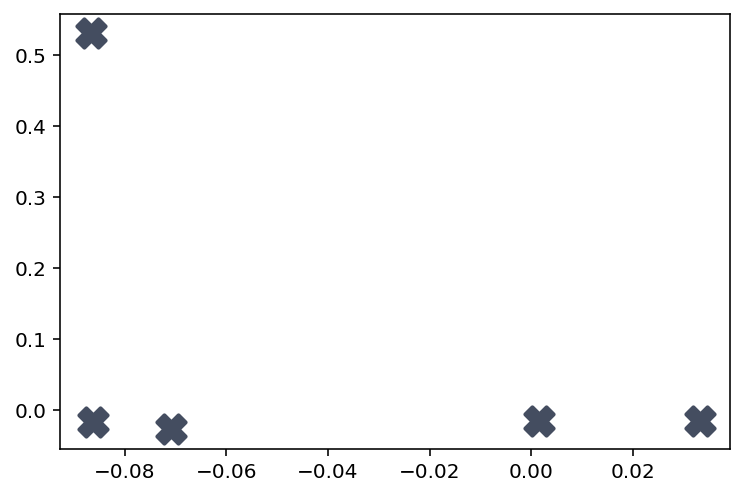

In [138]:

# Lets plot it again, but this time we add some color to it.
# This array needs to be at least the length of the n_clusters.
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

#plt.scatter(coords[:, 0], coords[:, 1], c=colors)
# Plot the cluster centers
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()



In [139]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,    min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [141]:
#Use this to print the top terms per cluster with matplotlib.
print(top_feats_per_cluster(X, labels, features, 0.1, 10))

[     features     score
0      polici  0.219389
1    procedur  0.206733
2      extens  0.150930
3     certifi  0.148005
4   complianc  0.134773
5          ew  0.119709
6     haedick  0.094657
7  legalonlin  0.089359
8    communic  0.087258
9     proceed  0.078694,      features     score
0       power  0.032455
1       price  0.030624
2      market  0.028504
3  california  0.028069
4      energi  0.027143
5       state  0.025618
6        said  0.024195
7      electr  0.021993
8     compani  0.019073
9        time  0.018198,   features     score
0    email  0.056707
1   messag  0.051325
2    pleas  0.030130
3   recipi  0.027759
4     week  0.026321
5     meet  0.025885
6   intend  0.025455
7   origin  0.023462
8     join  0.022919
9    lipca  0.022354,      features     score
0        know  0.063932
1        look  0.057800
2    forecast  0.041512
3      attach  0.039774
4         let  0.035197
5       email  0.031781
6        year  0.030129
7       koepk  0.029155
8  andmaureen  0.0277

   features     score
0      imag  0.025064
1      said  0.023271
2    electr  0.022829
3  procedur  0.019457
4       bid  0.017924
5      ferc  0.016240
6    polici  0.016167
7       iso  0.015312
8     nodal  0.013257
9    messag  0.012246


In [102]:
n_clusters = 5
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

In [103]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,    min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [104]:
 batch_size = 500
 clf = MiniBatchKMeans(n_clusters=n_clusters, init_size=1000, batch_size=batch_size, max_iter=100)  
 clf.fit(X)

MiniBatchKMeans(batch_size=500, init_size=1000, n_clusters=5)

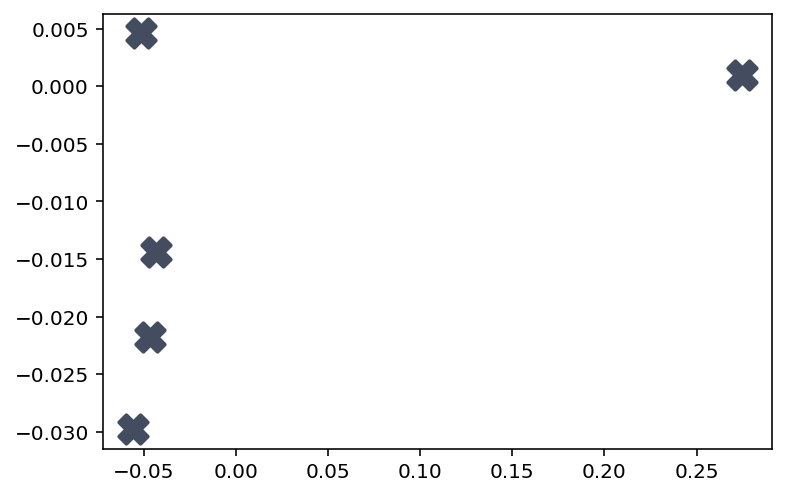

In [105]:
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()


In [ ]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))


NameError: ignored